In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
import seaborn as sns

print(sns.get_dataset_names())

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /opt/conda/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


In [3]:
tips = sns.load_dataset("tips")

tips_day = tips.groupby("day").mean().reset_index()
tips_day

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


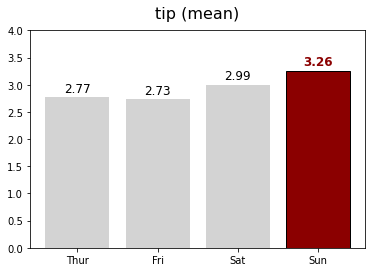

In [4]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax


fig, ax = plt.subplots()
ax = plot_example(ax)

In [5]:
type(ax.spines)

collections.OrderedDict

In [6]:
for k, v in ax.spines.items():
    print(f"spines[{k}] = {v}")

spines[left] = Spine
spines[right] = Spine
spines[bottom] = Spine
spines[top] = Spine


In [7]:
ax.spines.values()

odict_values([<matplotlib.spines.Spine object at 0x7fe8baed9250>, <matplotlib.spines.Spine object at 0x7fe8baed9390>, <matplotlib.spines.Spine object at 0x7fe8baed9490>, <matplotlib.spines.Spine object at 0x7fe8baed9590>])

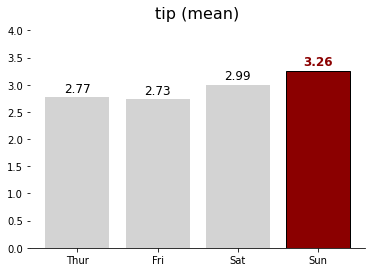

In [8]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

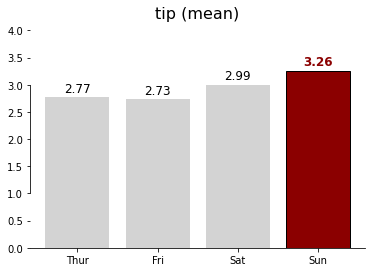

In [9]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_bounds(1, 3)

('outward', 0.0)

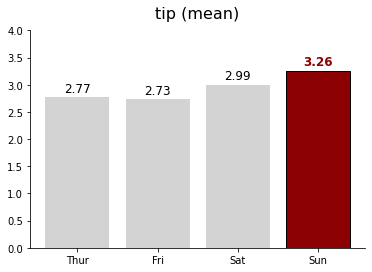

In [10]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].get_position()

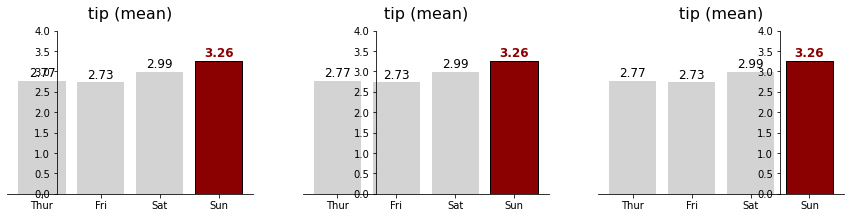

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): # 그래프 세개 한번에 그리기
    ax[i] = plot_example(ax[i])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    
# ax[0] : spine을 data 영역에서 지정된 거리만큼 이동  
ax[0].spines["left"].set_position(("outward", -50))

# ax[1] : spine을 axes의 지정된 위치에 설정
ax[1].spines["left"].set_position(("axes", 0.3))

# ax[2] : spine을 data의 지정된 위치에 설정
ax[2].spines["left"].set_position(("data", 2.5))


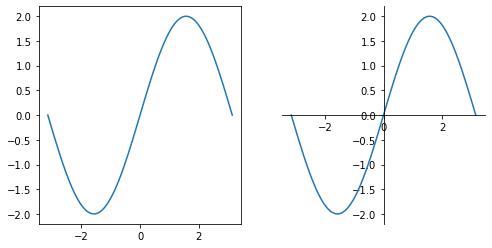

In [12]:
# data
x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

# normal plot
ax[0].plot(x, y)

# textbook
ax[1].plot(x, y)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_position(("data", 0))
ax[1].spines["bottom"].set_position(("data", 0))

plt.show()

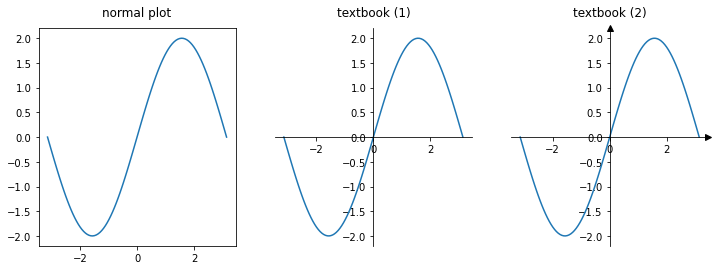

In [13]:
## data
x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

fig, ax = plt.subplots(ncols=3, figsize=(12,4))

## normal plot
ax[0].plot(x, y)
ax[0].set_title("normal plot", pad=12)

## textbook (1)
ax[1].plot(x, y)
ax[1].set_title("textbook (1)", pad=12)
# top, right 는 안보이게
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# left, bottom은 (0, 0)을 지나가게
ax[1].spines["left"].set_position(("data", 0))
ax[1].spines["bottom"].set_position(("data", 0))

## textbook (2)
ax[2].plot(x, y)
ax[2].set_title("textbook (2)", pad=12)
# top, right 는 안보이게
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
# left, bottom은 (0, 0)을 지나가게
ax[2].spines["left"].set_position(("data", 0))
ax[2].spines["bottom"].set_position(("data", 0))
# 화살표 추가
ax[2].plot(1, 0, ">k", transform=ax[2].get_yaxis_transform(), clip_on=False)
ax[2].plot(0, 1, "^k", transform=ax[2].get_xaxis_transform(), clip_on=False)

plt.show()

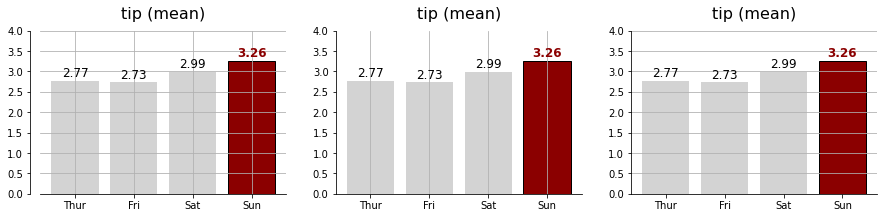

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): # 그래프 세개 한번에 그리기
    ax[i] = plot_example(ax[i])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[0].spines["left"].set_position(("outward", 10))
    
# ax[0] : x, y 둘 다 
ax[0].grid(axis="both")

# ax[1] : x축에서만
ax[1].grid(axis="x")

# ax[2] : y축에서만
ax[2].grid(axis="y")


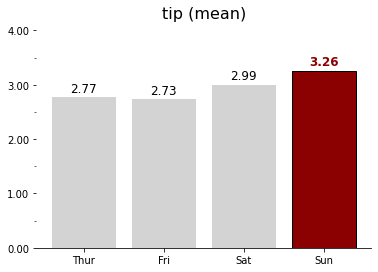

In [15]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
    
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter('{x:0.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))


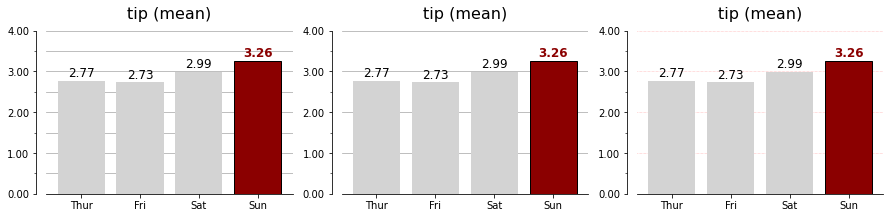

In [30]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

for i in range(3): # 그래프 세개 한번에 그리기
    ax[i] = plot_example(ax[i], zorder=2) # zorder: bar를 grid 앞으로.
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_position(("outward", 10))
    ax[i].yaxis.set_major_locator(MultipleLocator(1))
    ax[i].yaxis.set_major_formatter('{x:0.2f}')
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
    
# ax[0] : major, minor 둘 다
ax[0].grid(axis="y", which="both")

# ax[1] : major만
ax[1].grid(axis="y", which="major")

# ax[2] : major만 + 여러 옵션
ax[2].grid(axis="y", which="major", color="r", ls=":", lw=0.5, alpha=0.5)


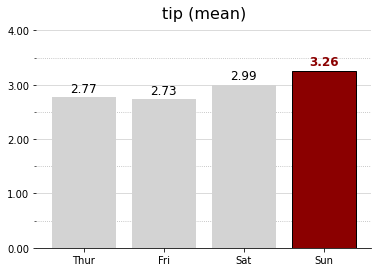

In [34]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
    
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter('{x:0.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")